Aim: Open the titanic.csv file, read from it, and print first 50 rows 

1. You must use the 'with' keyword to open your file. 
2. Since you are dealing with a csv file, you must first import the csv module
3. Use the csv.reader() function to open the file. Store the contents inside a variable. 
4. csv.reader() will return an object that you can iterate/loop over. These are also called iterators. 
5. Use next() function to get the names of the column. This will be returned as a list. Print the column names
6. Loop over the iterator object that csv.reader() returned to print only the first 50 rows from the dataset

In [2]:
import csv


file_path = 'C:/zy2024/NGEX5/titanic.csv'

with open(file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)  
    
    
    header = next(csv_reader)
    print("Column Names:", header)

    
    rows = []
    for index, row in enumerate(csv_reader):
        if index < 50:
            rows.append(row)
        else:
            break


for i, row in enumerate(rows, start=1):
    print(f"Row {i}: {row}")


Column Names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Row 1: ['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']
Row 2: ['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C']
Row 3: ['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S']
Row 4: ['4', '1', '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S']
Row 5: ['5', '0', '3', 'Allen, Mr. William Henry', 'male', '35', '0', '0', '373450', '8.05', '', 'S']
Row 6: ['6', '0', '3', 'Moran, Mr. James', 'male', '', '0', '0', '330877', '8.4583', '', 'Q']
Row 7: ['7', '0', '1', 'McCarthy, Mr. Timothy J', 'male', '54', '0', '0', '17463', '51.8625', 'E46', 'S']
Row 8: ['8', '0', '3', 'Palsson, Master. Gosta Leonard', 'male', '2', '3', '1', '34

Aim: Finding missing data, highlighting them, and printing them

1. Repeat the same process as above to open the csv file, use the next() function to access the header and thne for loop to start iterating over all the rows
2. Create a dictionary that stores the name of columns and the amount of missing values in it
3. Loop over every value of every row to find if there is an empty string inside, which would indicate a missing value
4. Once you find missing values, increment their value by 1 and then store it in the dictionary using the header name as the key and the increments as the value.
5. Loop over the dictionary to print each column name (key) and the missing values present in them 

In [4]:

import csv


file_path = 'C:/zy2024/NGEX5/titanic.csv'  

missing_data_count = {}


with open(file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    header = next(csv_reader)
    
    
    missing_data_count = {col_name: 0 for col_name in header}
    
   
    for row in csv_reader:
        for col_index, value in enumerate(row):
            if value == "":  
                col_name = header[col_index]
                missing_data_count[col_name] += 1  


for column, count in missing_data_count.items():
    print(f"{column}: {count} missing values")



PassengerId: 0 missing values
Survived: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 177 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 687 missing values
Embarked: 2 missing values


Aim: Calculate mean, median, and mode

1. Calcualte the appropriate central tendency value for the 'Age' column
2. Calcualte the appropriate central tendency value for the 'Fare' column
3. Calcualte the appropriate central tendency value for the 'Pclass' column
4. Calcualte the appropriate central tendency value for the 'Embarked' column
5. Calcualte the appropriate central tendency value for the 'Survived' column
6. Calcualte the appropriate central tendency value for the 'Sex' column


In [6]:
import csv
from collections import Counter
import numpy as np


file_path = 'C:/zy2024/NGEX5/titanic.csv'  


age_present = []
fare_list = []
pclass_list = []
embarked_list = []
survived_list = []
sex_list = []


with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
       
        if row['Age']:  
            age_present.append(float(row['Age']))
        
        
        if row['Fare']:  
            fare_list.append(float(row['Fare']))
        
       
        if row['Pclass']:
            pclass_list.append(int(row['Pclass']))
        
        
        if row['Embarked']:
            embarked_list.append(row['Embarked'])
        
        
        if row['Survived']:
            survived_list.append(int(row['Survived']))
        
        
        if row['Sex']:
            sex_list.append(row['Sex'])


mean_age = np.mean(age_present)
median_age = np.median(age_present)
mode_age = Counter(age_present).most_common(1)[0][0] if age_present else None


mean_fare = np.mean(fare_list)
median_fare = np.median(fare_list)
mode_fare = Counter(fare_list).most_common(1)[0][0] if fare_list else None


mode_pclass = Counter(pclass_list).most_common(1)[0][0] if pclass_list else None


mode_embarked = Counter(embarked_list).most_common(1)[0][0] if embarked_list else None


mode_survived = Counter(survived_list).most_common(1)[0][0] if survived_list else None


mode_sex = Counter(sex_list).most_common(1)[0][0] if sex_list else None


results = {
    "Age": {"Mean": mean_age, "Median": median_age, "Mode": mode_age},
    "Fare": {"Mean": mean_fare, "Median": median_fare, "Mode": mode_fare},
    "Pclass": {"Mode": mode_pclass},
    "Embarked": {"Mode": mode_embarked},
    "Survived": {"Mode": mode_survived},
    "Sex": {"Mode": mode_sex}
}

results


{'Age': {'Mean': np.float64(29.69911764705882),
  'Median': np.float64(28.0),
  'Mode': 24.0},
 'Fare': {'Mean': np.float64(32.204207968574636),
  'Median': np.float64(14.4542),
  'Mode': 8.05},
 'Pclass': {'Mode': 3},
 'Embarked': {'Mode': 'S'},
 'Survived': {'Mode': 0},
 'Sex': {'Mode': 'male'}}

Aim: Plotting different variables from the dataset

1. Use the most suitable plot to visualize 'Age' variable
2. Use the most suitable plot to visualize 'Pclass' variable
3. Use the most suitable plot to visualize 'Sex' variable
4. Use the most suitable plot to visualize 'Survived' variable
5. Use the most suitable plot to visualize 'Fare' variable
6. Use the most suitable plot to visualize 'Embarked' variable

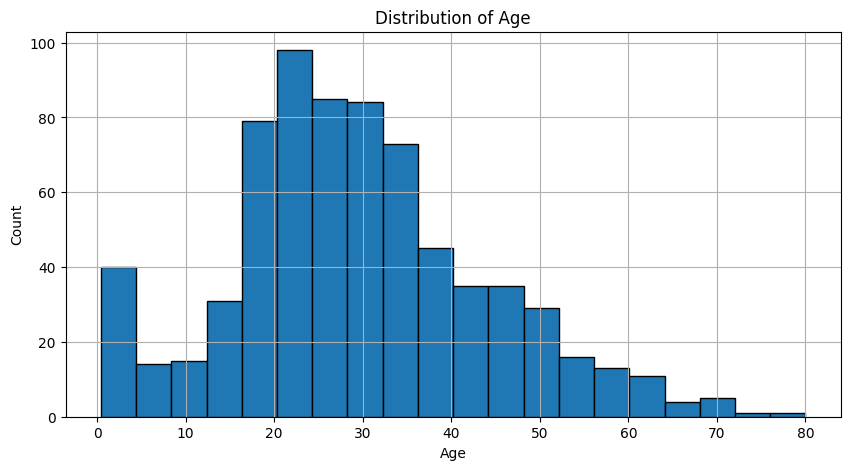

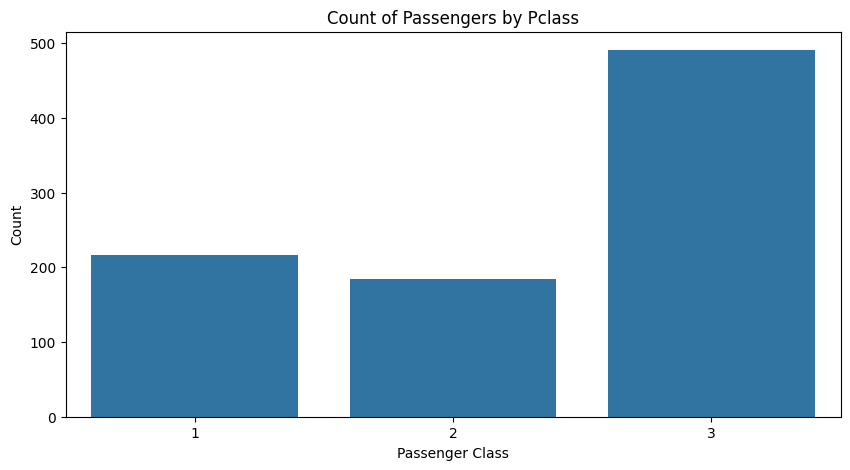

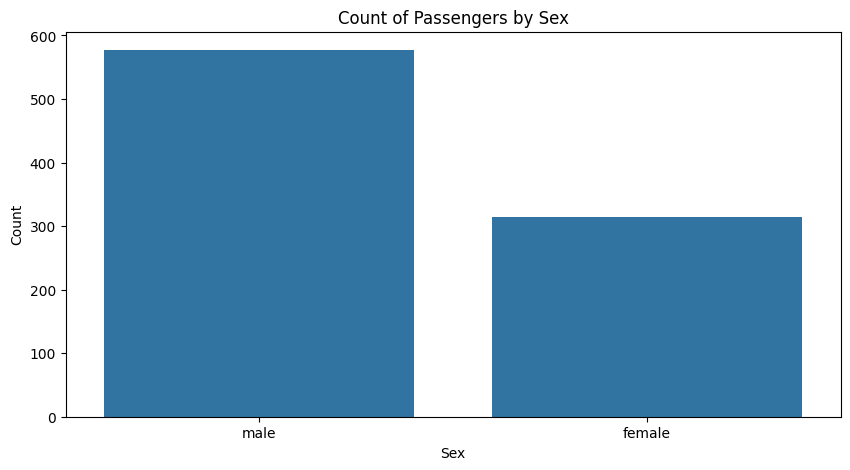

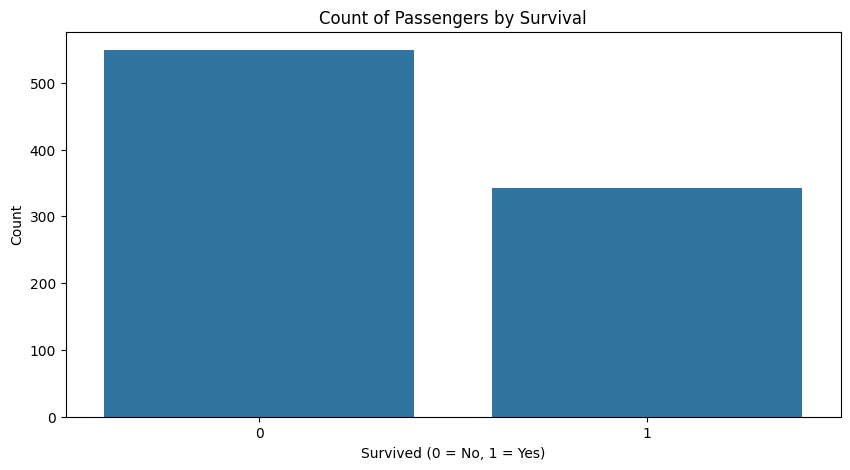

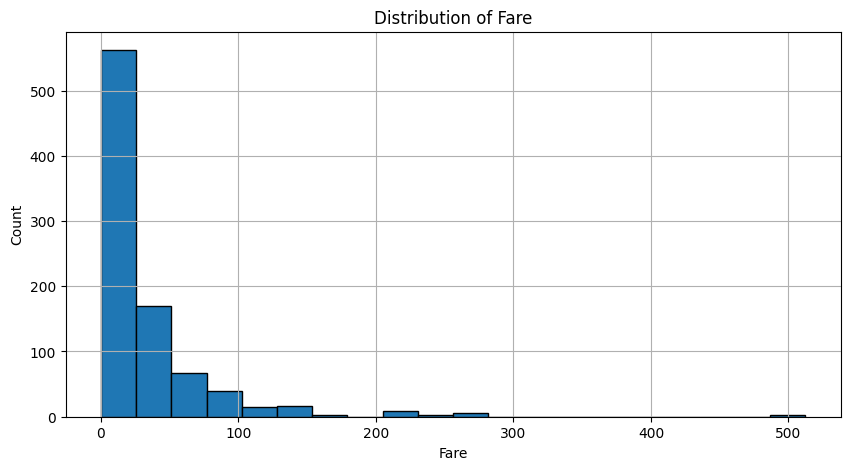

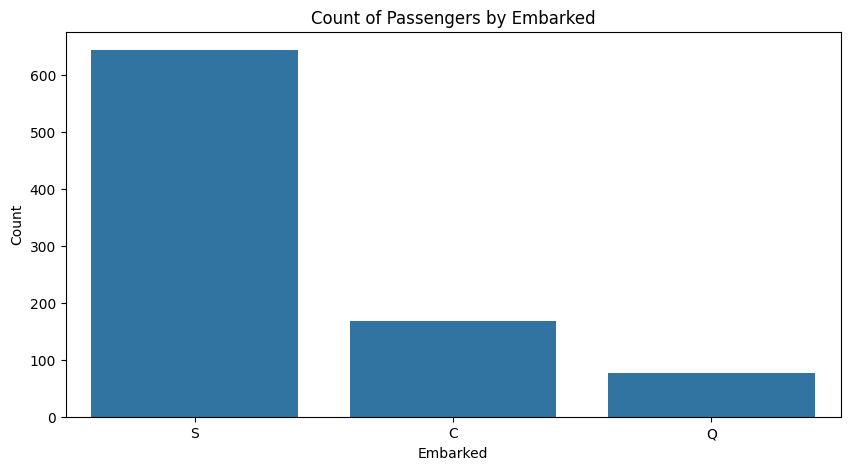

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv


file_path = 'C:/zy2024/NGEX5/titanic.csv'


age_present = []
fare_list = []
pclass_list = []
embarked_list = []
survived_list = []
sex_list = []


with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Age']:
            age_present.append(float(row['Age']))
        if row['Fare']:
            fare_list.append(float(row['Fare']))
        if row['Pclass']:
            pclass_list.append(int(row['Pclass']))
        if row['Embarked']:
            embarked_list.append(row['Embarked'])
        if row['Survived']:
            survived_list.append(int(row['Survived']))
        if row['Sex']:
            sex_list.append(row['Sex'])


plt.figure(figsize=(10, 5))
plt.hist(age_present, bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x=pclass_list)
plt.title('Count of Passengers by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x=sex_list)
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x=survived_list)
plt.title('Count of Passengers by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 5))
plt.hist(fare_list, bins=20, edgecolor='black')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x=embarked_list)
plt.title('Count of Passengers by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


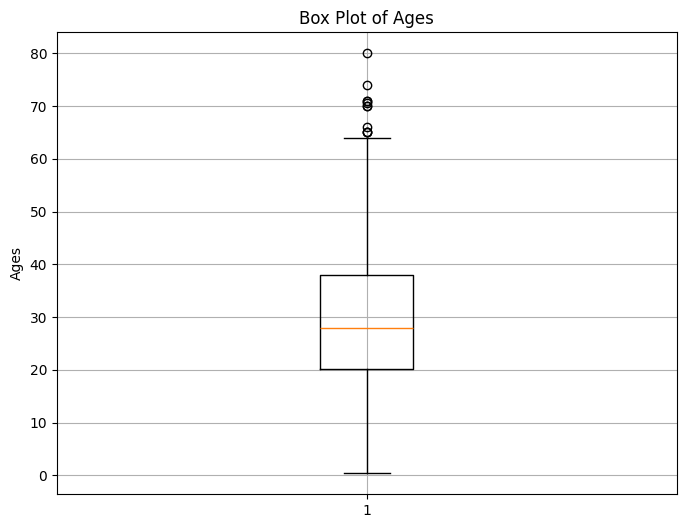

In [8]:
import csv
import matplotlib.pyplot as plt


file_path = 'C:/zy2024/NGEX5/titanic.csv'  


valid_ages = []


with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Age']:  
            valid_ages.append(float(row['Age']))


plt.figure(figsize=(8, 6))
plt.boxplot(valid_ages)
plt.title('Box Plot of Ages')
plt.ylabel('Ages')
plt.grid(True)
plt.show()


C:\Users\18736\AppData\Local\Temp\ipykernel_15436\3990233001.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['1st Class', '2nd Class', '3rd Class'])


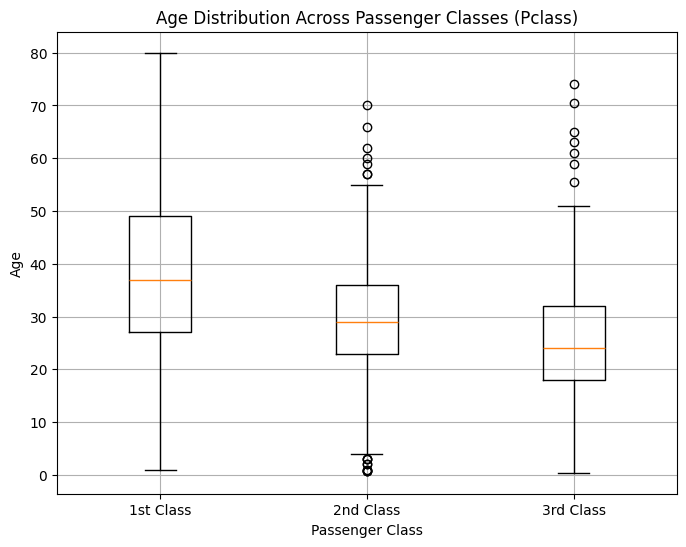

In [9]:
import matplotlib.pyplot as plt
import csv


file_path = 'C:/zy2024/NGEX5/titanic.csv'  


pclass_1_age = []
pclass_2_age = []
pclass_3_age = []

with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Age']:  
            age = float(row['Age'])
            pclass = int(row['Pclass'])
            
            
            if pclass == 1:
                pclass_1_age.append(age)
            elif pclass == 2:
                pclass_2_age.append(age)
            elif pclass == 3:
                pclass_3_age.append(age)


data = [pclass_1_age, pclass_2_age, pclass_3_age]


plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=['1st Class', '2nd Class', '3rd Class'])
plt.title('Age Distribution Across Passenger Classes (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.grid(True)
plt.show()


Bar chart for Sex

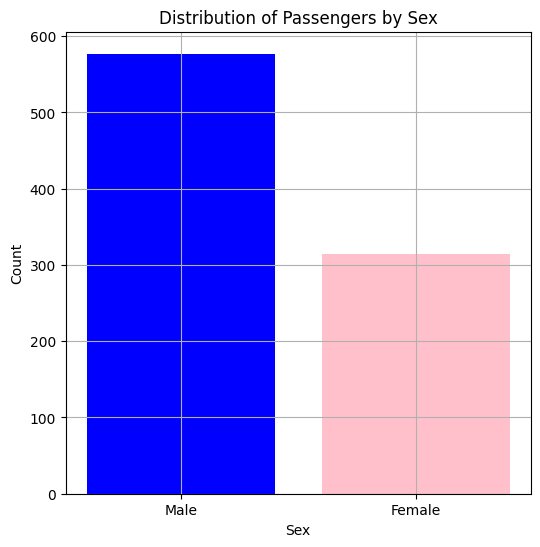

In [10]:
import matplotlib.pyplot as plt
import csv


file_path = 'C:/zy2024/NGEX5/titanic.csv'  

male_count = 0
female_count = 0


with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Sex'] == 'male':
            male_count += 1
        elif row['Sex'] == 'female':
            female_count += 1


categories = ['Male', 'Female']
counts = [male_count, female_count]


plt.figure(figsize=(6, 6))
plt.bar(categories, counts, color=['blue', 'pink'])
plt.title('Distribution of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Bar chart for PClass

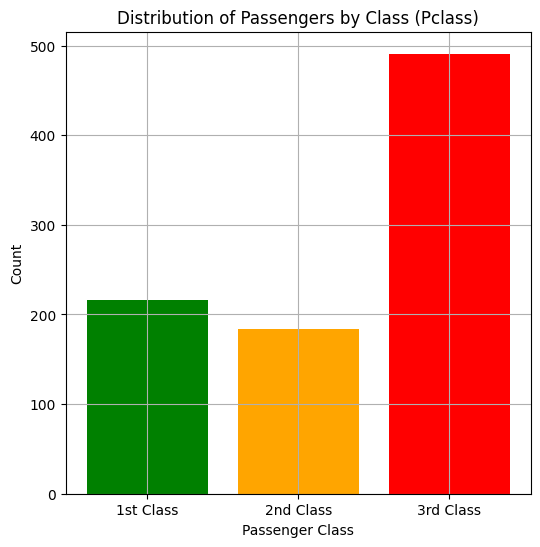

In [11]:
import matplotlib.pyplot as plt
import csv


file_path = 'C:/zy2024/NGEX5/titanic.csv'  


class_1_count = 0
class_2_count = 0
class_3_count = 0


with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Pclass'] == '1':
            class_1_count += 1
        elif row['Pclass'] == '2':
            class_2_count += 1
        elif row['Pclass'] == '3':
            class_3_count += 1


categories = ['1st Class', '2nd Class', '3rd Class']
counts = [class_1_count, class_2_count, class_3_count]

plt.figure(figsize=(6, 6))
plt.bar(categories, counts, color=['green', 'orange', 'red'])
plt.title('Distribution of Passengers by Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()



Histogram for the Fare

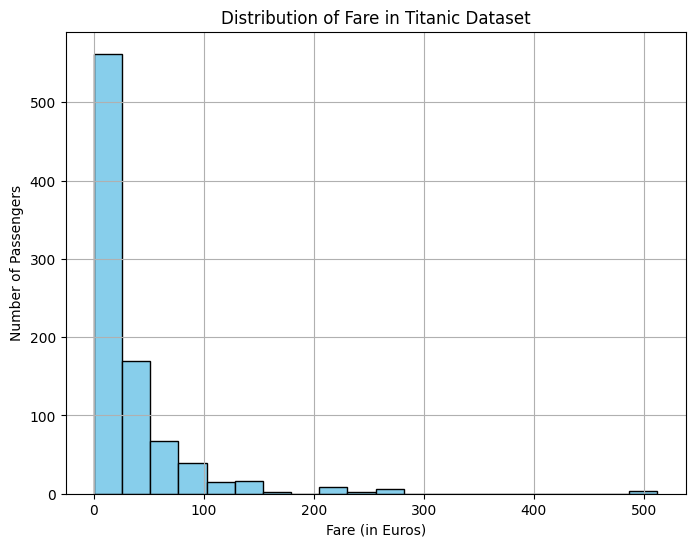

In [12]:
import matplotlib.pyplot as plt
import csv


file_path = 'C:/zy2024/NGEX5/titanic.csv'  


fare_data = []


with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Fare']:  
            fare_data.append(float(row['Fare']))


plt.figure(figsize=(8, 6))
plt.hist(fare_data, bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Fare in Titanic Dataset')
plt.xlabel('Fare (in Euros)')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


Bar chart of survival rate by sex

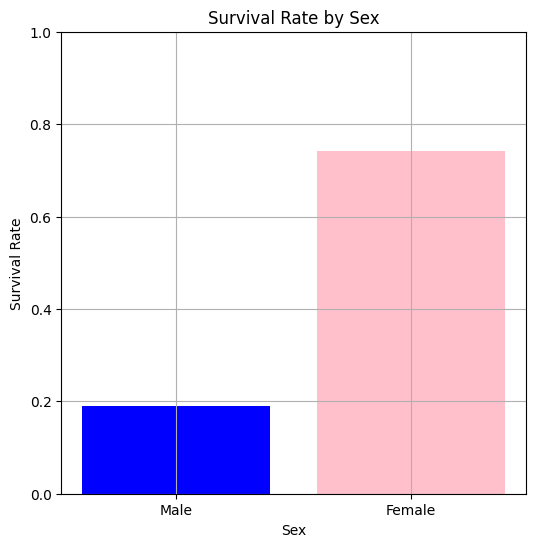

In [13]:
import matplotlib.pyplot as plt
import csv


file_path = 'C:/zy2024/NGEX5/titanic.csv' 


total_males = 0
total_females = 0
survived_males = 0
survived_females = 0


with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        sex = row['Sex']
        survived = int(row['Survived'])
        
        if sex == 'male':
            total_males += 1
            if survived == 1:
                survived_males += 1
        elif sex == 'female':
            total_females += 1
            if survived == 1:
                survived_females += 1


survival_rate_male = survived_males / total_males if total_males > 0 else 0
survival_rate_female = survived_females / total_females if total_females > 0 else 0


plt.figure(figsize=(6, 6))
plt.bar(['Male', 'Female'], [survival_rate_male, survival_rate_female], color=['blue', 'pink'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  
plt.grid(True)
plt.show()


Survival rate by passenger class

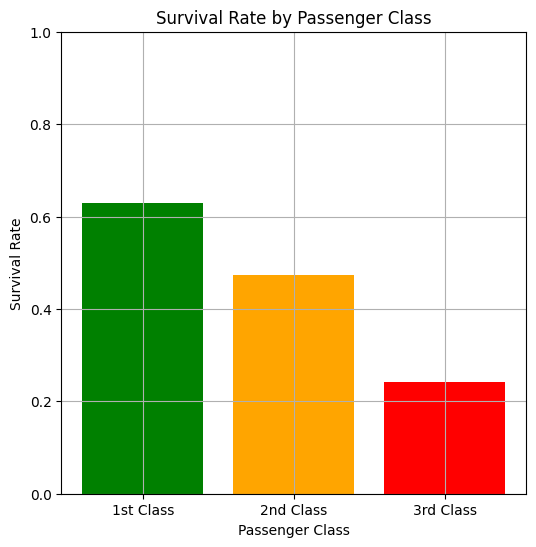

In [14]:
import matplotlib.pyplot as plt
import csv


file_path = 'C:/zy2024/NGEX5/titanic.csv'  


total_class_1 = 0
total_class_2 = 0
total_class_3 = 0
survived_class_1 = 0
survived_class_2 = 0
survived_class_3 = 0


with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        pclass = int(row['Pclass'])
        survived = int(row['Survived'])
        
        if pclass == 1:
            total_class_1 += 1
            if survived == 1:
                survived_class_1 += 1
        elif pclass == 2:
            total_class_2 += 1
            if survived == 1:
                survived_class_2 += 1
        elif pclass == 3:
            total_class_3 += 1
            if survived == 1:
                survived_class_3 += 1


survival_rate_class_1 = survived_class_1 / total_class_1 if total_class_1 > 0 else 0
survival_rate_class_2 = survived_class_2 / total_class_2 if total_class_2 > 0 else 0
survival_rate_class_3 = survived_class_3 / total_class_3 if total_class_3 > 0 else 0


plt.figure(figsize=(6, 6))
plt.bar(['1st Class', '2nd Class', '3rd Class'], 
        [survival_rate_class_1, survival_rate_class_2, survival_rate_class_3], 
        color=['green', 'orange', 'red'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  
plt.grid(True)
plt.show()


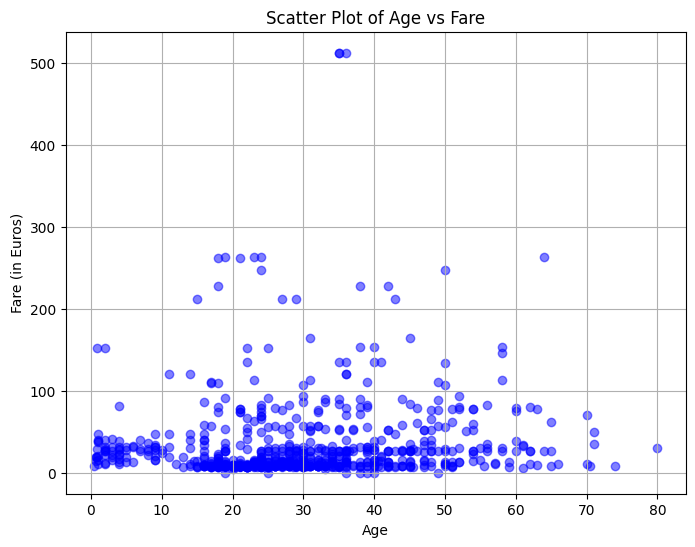

In [15]:
import matplotlib.pyplot as plt
import csv


file_path = 'C:/zy2024/NGEX5/titanic.csv'  


age_data = []
fare_data = []


with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Age'] and row['Fare']:  
            age_data.append(float(row['Age']))
            fare_data.append(float(row['Fare']))


plt.figure(figsize=(8, 6))
plt.scatter(age_data, fare_data, alpha=0.5, color='blue')

plt.xlabel('Age')
plt.ylabel('Fare (in Euros)')
plt.title('Scatter Plot of Age vs Fare')
plt.grid(True)
plt.show()


Fare vs. survival rate

C:\Users\18736\AppData\Local\Temp\ipykernel_15436\51244976.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(fare_data, labels=labels)


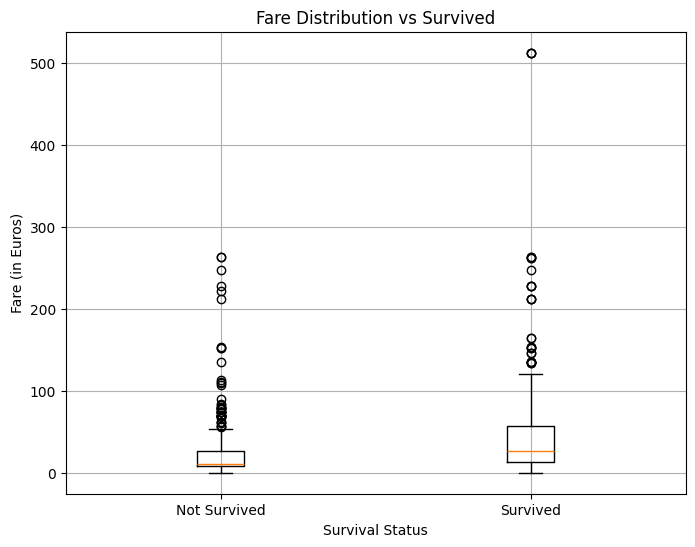

C:\Users\18736\AppData\Local\Temp\ipykernel_15436\51244976.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(age_data, labels=labels)


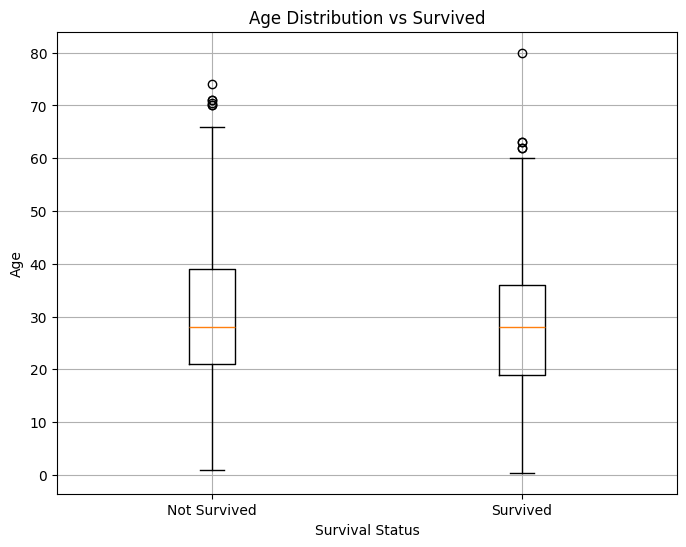

In [16]:
import matplotlib.pyplot as plt
import csv


file_path = 'C:/zy2024/NGEX5/titanic.csv'  


fare_survived = []
fare_not_survived = []
age_survived = []
age_not_survived = []


with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row['Fare'] and row['Survived']:  
            fare = float(row['Fare'])
            survived = int(row['Survived'])  
            
            if survived == 1:
                fare_survived.append(fare)
            else:
                fare_not_survived.append(fare)
        
        if row['Age'] and row['Survived']:  
            age = float(row['Age'])
            survived = int(row['Survived'])  
            
            if survived == 1:
                age_survived.append(age)
            else:
                age_not_survived.append(age)


fare_data = [fare_not_survived, fare_survived]
labels = ['Not Survived', 'Survived']


plt.figure(figsize=(8, 6))
plt.boxplot(fare_data, labels=labels)
plt.title('Fare Distribution vs Survived')
plt.xlabel('Survival Status')
plt.ylabel('Fare (in Euros)')
plt.grid(True)
plt.show()


age_data = [age_not_survived, age_survived]


plt.figure(figsize=(8, 6))
plt.boxplot(age_data, labels=labels)
plt.title('Age Distribution vs Survived')
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.grid(True)
plt.show()
